In [1]:
import WimpRate as wrDDI # David Díez Ibáñez
import wimprates as wrJA # Jelle Aalbers
import matplotlib.pyplot as plt
import numpy as np
import numericalunits as nu

ATOMIC_WEIGHT = dict(
    Xe=131.293,
    Ar=39.948,
    Ge=72.64,
    Ne=20.1797,
    C=12.0107, 
    H=1.00797
    )
A = ATOMIC_WEIGHT['Ne'] ## Nucleus mass

/usr/local/lib/python3.7/dist-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

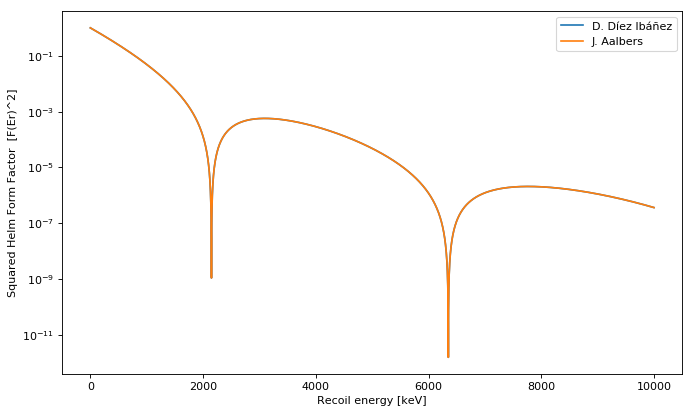

In [2]:
## Form Factor
## Ligeras diferencias en la posiciñon de los ceros. Para neón, el segundo cero se dicerencia en algo menos de 100 keV, entre 6300 y 6400.

energies = np.linspace(0.001, 10000, 10000)
T = 1
MD = 1

F2 = wrDDI.FormFactor2(energies, ATOMIC_WEIGHT['Ne'])
F2Aalbers = wrJA.helm_form_factor_squared(energies * nu.keV, anucl=ATOMIC_WEIGHT['Ne'])

plt.figure(1)
plt.figure(figsize=(10, 6), dpi=80)
plt.plot(energies, F2, label='D. Díez Ibáñez')
plt.plot(energies, F2Aalbers, label='J. Aalbers')

plt.xlabel("Recoil energy [keV]")
plt.ylabel("Squared Helm Form Factor  [F(Er)^2]")
##plt.title("$m_\chi = 100$ GeV/c${}^2$. $\sigma_\chi = 10^{-45}$ cm${}^2$")
#plt.xlim(6000,7000)
#plt.ylim(10**(-10), 10)
#plt.xscale('log')
plt.yscale('log')
plt.legend()

In [3]:
ATOMIC_WEIGHT['Ne'] * nu.amu 

9.644409665116871e-25

In [4]:
nu.amu

4.7792631531275845e-26

5.700833079441135e-31


<Figure size 432x288 with 0 Axes>

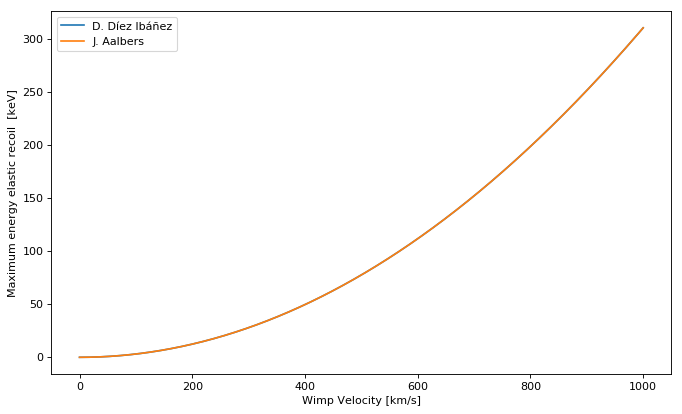

In [5]:
## Max Energy
## Sutil diferencia debida a las distintas masas en mi función meto Mn*A, en la de J.Aalbers directamente ATOMIC_WEIGHT['Ne']. Si se cambia ese parámetro coinciden al la perfección (ya hecho)
# Creo que es mejor multiplicar por Mn para tener el meso nuclear en unicades de GeV/c2, en general el atomic weight viene deado en numero promedio de nucleones, para tener unidades de 
# peso hay que multiplicar por el peso de un nucleón.

mw = 100
vel = np.linspace(0,1000,1000)
emJ = wrJA.e_max(mw, vel, m_nucleus=ATOMIC_WEIGHT['Ne'])*(10**6/300000**2) # Energy recoil en keV. m_nucleous = wrJA.mn('Ne')
emJU = wrJA.e_max(mw* nu.GeV/nu.c0**2, vel, m_nucleus=ATOMIC_WEIGHT['Ne']) 
emD = wrDDI.Emax(vel, mw, ATOMIC_WEIGHT['Ne']) # En keV
print(nu.GeV/nu.c0**2*(10**6/300000**2))


plt.figure(1)
plt.figure(figsize=(10, 6), dpi=80)
plt.plot(vel, emD, label='D. Díez Ibáñez')
plt.plot(vel, emJ, label='J. Aalbers')

plt.xlabel("Wimp Velocity [km/s]")
plt.ylabel("Maximum energy elastic recoil  [keV]")
##plt.title("$m_\chi = 100$ GeV/c${}^2$. $\sigma_\chi = 10^{-45}$ cm${}^2$")
#plt.xlim(6000,7000)
#plt.ylim(10**(-10), 10)
#plt.xscale('log')
#plt.yscale('log')
plt.legend()

In [6]:
## Nucleus cross section 
# Asume J.Aalbers que Mn=1, y trabja en unidades no atómicas si no de energía (factor de conversion nu.amu)
mw = 100
sigma_nucleon = 10**(-45)
sigma_nucleonU=sigma_nucleon * nu.cm**2

sigma_nucleusJA = (sigma_nucleon * (wrJA.mu_nucleus(mw* nu.amu, 'Ne') / wrJA.reduced_mass(nu.amu, mw* nu.amu)) ** 2 * ATOMIC_WEIGHT['Ne']**2)
sigma_nucleusJAU = (sigma_nucleon * (wrJA.mu_nucleus(mw* nu.GeV/nu.c0**2, 'Ne') / wrJA.reduced_mass(nu.amu, mw* nu.GeV/nu.c0**2)) ** 2 * ATOMIC_WEIGHT['Ne']**2) 
# Units not closed so value varies each compilation. It's due to sigma_nucleonU units
sigma_nucleusDDI = wrDDI.sigmaNucleus(mw, sigma_nucleon, ATOMIC_WEIGHT['Ne'])
print(sigma_nucleusJA)
print(sigma_nucleusDDI)

print( wrJA.mu_nucleus(mw * nu.amu, 'Ne') / wrJA.reduced_mass(nu.amu, mw * nu.amu) )
print( wrDDI.mr(mw, ATOMIC_WEIGHT['Ne']) / wrDDI.mr(mw, 1) )
print('---------')
print(wrJA.mu_nucleus(mw* nu.amu, 'Ne') / nu.amu) 
print(wrDDI.mr(mw, ATOMIC_WEIGHT['Ne']))
print(wrJA.reduced_mass(nu.amu, mw * nu.amu) /nu.amu)
print(wrDDI.mr(mw, 1))


1.1712223158316315e-40
1.1712223158316327e-40
16.959184454612547
16.959184454612554
---------
16.791271737240148
16.79127173724015
0.9900990099009903
0.9900990099009901


/home/davidp/.local/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/home/davidp/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


<Figure size 432x288 with 0 Axes>

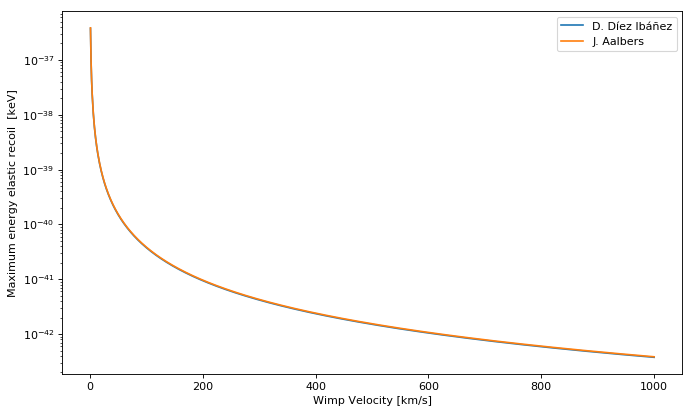

In [7]:
#print(sigma_nucleusJAU/emJU)
#print(sigma_nucleusDDI/emD)   Siguen sin estar bien cerradas las unidades. Valores cambian al compilar de nuevo. 
plt.figure(1)
plt.figure(figsize=(10, 6), dpi=80)
plt.plot(vel, sigma_nucleusDDI/emD, label='D. Díez Ibáñez')
plt.plot(vel, sigma_nucleusJAU/emJ, label='J. Aalbers')

plt.xlabel("Wimp Velocity [km/s]")
plt.ylabel("Maximum energy elastic recoil  [keV]")
##plt.title("$m_\chi = 100$ GeV/c${}^2$. $\sigma_\chi = 10^{-45}$ cm${}^2$")
#plt.xlim(6000,7000)
#plt.ylim(10**(-10), 10)
#plt.xscale('log')
plt.yscale('log')
plt.legend()


In [8]:
## Difrential cross section
## dSigmaN/dEr = SigmaN * F^2 / Emax

mw = 100
sigma0 = 10**(-45)
ener = 100
vel = 10
dsJ = wrJA.sigma_erec(ener *nu.keV , vel, mw , sigma0, interaction='SI', m_med=float('inf'), material='Ne')
dsD = wrDDI.diffCrossSec(ener, vel, mw, sigma0, ATOMIC_WEIGHT['Ne'])
print(dsJ)
print(dsD)
print(sigma_nucleusJA * F2Aalbers[100] / emJ[10])
print('-------')
print(sigma_nucleusJA)
print(emJ[10])
print(F2Aalbers[100])


6.571182112671045e-19
2.8832991529775185e-39
2.8774496020162404e-39
-------
1.1712223158316315e-40
0.031110642778696292
0.7643237792857925


In [9]:
import numpy as np

vel = np.linspace(1,10,10)
a = np.fmin( 1., (wrDDI.VESC**2 - wrDDI.VEARTH**2 - vel**2)/(2*wrDDI.VEARTH*vel) )
#a = np.fmin(2., vel)
print(a)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [10]:
nu.km/nu.s

398388.8721639108

<Figure size 432x288 with 0 Axes>

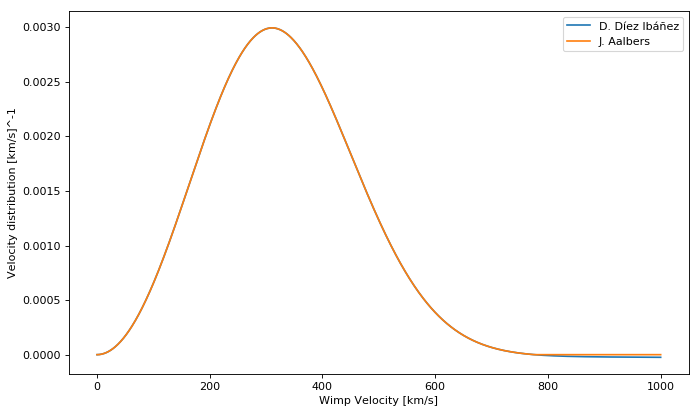

In [11]:
## Velocity distribution
# Otra vez cuestión de unidades en J. Aalbers, meter v multiplicado por sus unidades y lo que saca la funcion está en unidades de 1/v, así que multiplicar por nu.km/nu.s 
# para deshacer el entuerto. Coefficiente de normalización aparece multiplicando, ignoro el porqué. 

vel = np.linspace(0.1,1000,1000)
vJ = wrJA.observed_speed_dist(vel*nu.km/nu.s, t=None, v_0=None, v_esc=None)* nu.km/nu.s
#vJ = wrJA.observed_speed_dist(vel, t=None, v_0=None, v_esc=None)
vD = wrDDI.vDist(vel)

plt.figure(1)
plt.figure(figsize=(10, 6), dpi=80)
plt.plot(vel, vD, label='D. Díez Ibáñez')
plt.plot(vel, vJ, label='J. Aalbers')

plt.xlabel("Wimp Velocity [km/s]")
plt.ylabel("Velocity distribution [km/s]^-1")
##plt.title("$m_\chi = 100$ GeV/c${}^2$. $\sigma_\chi = 10^{-45}$ cm${}^2$")
#plt.xlim(6000,7000)
#plt.ylim(10**(-10), 10)
#plt.xscale('log')
#plt.yscale('log')
plt.legend()

In [12]:
np.sum(vD*1000/1000)

0.9818595799712042

179.46510595314442
1794.6510595314442
1794.6510595314446


<Figure size 432x288 with 0 Axes>

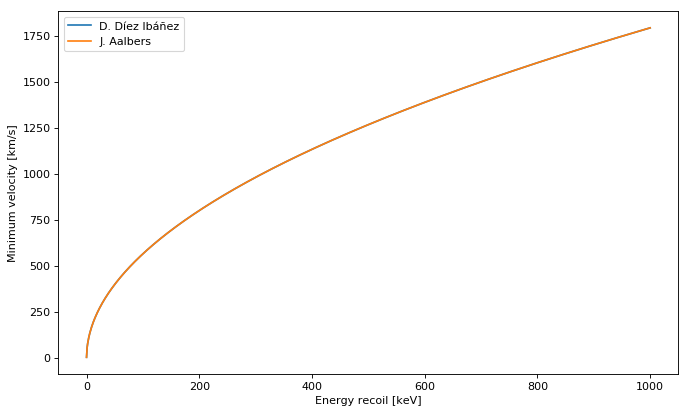

In [13]:
# Vel min
# Para un nuclear recoil de 10 keV, la particula incidente ha de tener una velocidad de 180km/s aprox si Mw=100GeV/c^2

erec = np.linspace(0.01, 1000, 1000)
v_minJ = wrJA.vmin_elastic(erec *10**(-6), mw *nu.amu, 'Ne') * np.sqrt(nu.amu) * 300000
v_minD = wrDDI.vmin_elastic(erec, mw, ATOMIC_WEIGHT['Ne'])
print(wrDDI.vmin_elastic(10, mw, ATOMIC_WEIGHT['Ne']))
print(v_minD[999])
print(v_minJ[999])

plt.figure(1)
plt.figure(figsize=(10, 6), dpi=80)
plt.plot(erec, v_minD, label='D. Díez Ibáñez')
plt.plot(erec, v_minJ, label='J. Aalbers')

plt.xlabel("Energy recoil [keV]")
plt.ylabel("Minimum velocity [km/s]")
plt.legend()

In [14]:
# Mi variante
mw = 100 #GeV/c^2
sigma_nucleon=1e-45 #cm^2
v=200 #km/s
es = 10 #keV

print(wrJA.mu_nucleus(mw*nu.amu, 'Ne'))
print(wrJA.reduced_mass(nu.amu, mw*nu.amu))
#print(wrJA.e_max(mw, v, ATOMIC_WEIGHT['Ne']))
sigma_nucleus = (sigma_nucleon* (wrJA.mu_nucleus(mw*nu.amu, 'Ne') / wrJA.reduced_mass(nu.amu, mw*nu.amu)) ** 2 * ATOMIC_WEIGHT['Ne']**2)
print(sigma_nucleus)
print(sigma_nucleon)

print('------')

print(wrJA.e_max(mw, v, ATOMIC_WEIGHT['Ne'])*(10**6/300000**2))
print(wrDDI.Emax(v, mw, ATOMIC_WEIGHT['Ne'])) 
print(wrJA.helm_form_factor_squared(es*nu.keV, anucl=ATOMIC_WEIGHT['Ne']))
print(wrDDI.FormFactor2(es, ATOMIC_WEIGHT['Ne']))

#sigma_nucleus / (e_max(mw, v, ATOMIC_WEIGHT['Ne'])) * helm_form_factor_squared(erec, anucl=ATOMIC_WEIGHT['Ne'])

8.024990630794444e-25
4.7319437159679063e-26
1.1712223158316315e-40
1e-45
------
12.41938104151267
12.41938104151267
0.973712546784227
0.9737125467842269


In [15]:
# J.Aalbers variant
mw = 100
sigma_nucleon=1e-45
v=200
es = 10

es=es * nu.keV
mw = mw * nu.GeV / nu.c0**2
sigma_nucleon=sigma_nucleon * nu.cm**2

print(wrJA.mu_nucleus(mw, 'Ne'))
print(wrJA.reduced_mass(nu.amu, mw))
#print(wrJA.e_max(mw, v, ATOMIC_WEIGHT['Ne']))
sigma_nucleus = (sigma_nucleon/nu.cm**2 * (wrJA.mu_nucleus(mw, 'Ne') / wrJA.reduced_mass(nu.amu, mw)) ** 2* ATOMIC_WEIGHT['Ne']**2)
print(sigma_nucleus)
print(sigma_nucleon) # Difference here, this value is 1.2563...10^-48 instead of 1*10-45. The value changes every time it is compiled. Units of nu.cm**2 affecting

print('------')

print(wrJA.mn('Ne'))
print(wrJA.mn('Ne')/nu.amu)
print(ATOMIC_WEIGHT['Ne'])
print(ATOMIC_WEIGHT['Ne']*nu.amu)
a = wrJA.mn('Ne')/nu.amu

print(wrJA.e_max(mw / nu.GeV * nu.c0**2, v, wrJA.mn('Ne')/nu.amu )*(10**6/300000**2))
print(wrJA.e_max(mw / nu.GeV * nu.c0**2, v, ATOMIC_WEIGHT['Ne'])*(10**6/300000**2))
print(wrJA.helm_form_factor_squared(es, anucl=ATOMIC_WEIGHT['Ne'])) # Difference in value of energy when multiplied by nu.keV. Correct value when entered as  es * nu.keV

#sigma_nucleus / wrJA.e_max(mw, v, wrJA.mn('Ne')) * wrJA.helm_form_factor_squared(erec, anucl=ATOMIC_WEIGHT['Ne'])

8.118376407312907e-25
4.73515545928407e-26
1.1970141776516746e-40
2.9718943322002964e-48
------
9.644409665116871e-25
20.179699999999997
20.1797
9.644409665116871e-25
12.41938104151267
12.41938104151267
0.973712546784227


0.29283216623563546
0.27773807802185413
9.31832608948176e+45
-----


<Figure size 432x288 with 0 Axes>

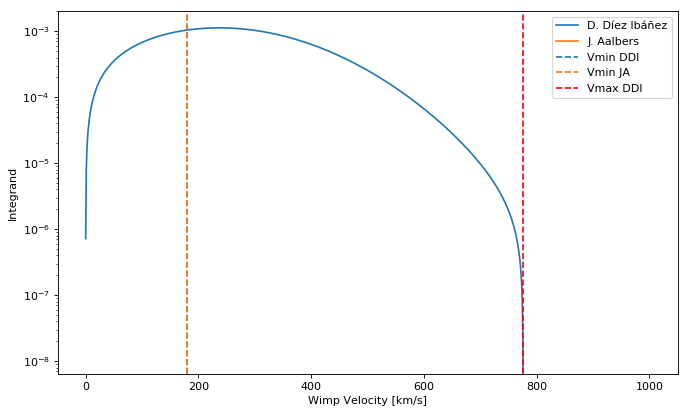

In [16]:
mw = 100
sigma_nucleon=1e-45
v = np.linspace(0.1,1000,1000)
es = 10
rho_dm = 0.3

esU=es * nu.keV
mwU = mw * nu.GeV / nu.c0**2
vU = v *nu.km /nu.s
sigma_nucleonU=sigma_nucleon * nu.cm**2
rho_dmU = rho_dm * nu.GeV/nu.c0**2 / nu.cm**3


print(wrJA.rate_elastic(esU, mwU, sigma_nucleonU, interaction='SI', m_med=float('inf'), t=None, material='Ne', halo_model=None)* (nu.keV * (1000 * nu.kg) * nu.year))
print(wrDDI.rate(es, mw, sigma_nucleon, ATOMIC_WEIGHT['Ne'], T, MD))
print(rho_dm / mwU * (1 / wrJA.mn()))
print('-----')
#print(wrJA.sigma_erec(esU, v, mwU, sigma_nucleonU, interaction='SI', m_med=float('inf'), material='Ne') * v * wrJA.observed_speed_dist(v, t=None, v_0=None, v_esc=None))
IntegrandoJ = rho_dm / mw * (1 / wrJA.mn()/nu.amu) * wrJA.sigma_erec(es, v, mw, sigma_nucleon, interaction='SI', m_med=float('inf'), material='Ne') * v * wrJA.observed_speed_dist(vU, t=None, v_0=None, v_esc=None)* nu.km/nu.s
#print(IntegrandoJ)
IntegrandoD = wrDDI.time(1) * wrDDI.flux(v, mw) * wrDDI.diffCrossSec(es, v, mw, sigma_nucleon, ATOMIC_WEIGHT['Ne']) * wrDDI.mass(1, ATOMIC_WEIGHT['Ne']) * wrDDI.vDist(v)


plt.figure(1)
plt.figure(figsize=(10, 6), dpi=80)
plt.plot(v, IntegrandoD, label='D. Díez Ibáñez')
plt.plot(v, IntegrandoJ, label='J. Aalbers')
plt.axvline(x=wrDDI.vmin_elastic(es, mw, ATOMIC_WEIGHT['Ne']), color='tab:blue', ls='--', label='Vmin DDI')
#plt.axvline(x=wrJA.vmin_elastic(esU, mwU, 'Ne'), color='tab:orange', ls='--', label='Vmin JA')
plt.axvline(x=wrJA.vmin_elastic(es *10**(-6), mw * nu.amu, 'Ne') * np.sqrt(nu.amu) * 300000, color='tab:orange', ls='--', label='Vmin JA')


plt.axvline(x=544+232, color='r', ls='--', label='Vmax DDI')
 

plt.xlabel("Wimp Velocity [km/s]")
plt.ylabel("Integrand")
##plt.title("$m_\chi = 100$ GeV/c${}^2$. $\sigma_\chi = 10^{-45}$ cm${}^2$")
#plt.xlim(6000,7000)
#plt.ylim(10**(-10), 10)
#plt.xscale('log')
plt.yscale('log')
plt.legend()


In [17]:
energies = np.linspace(0.001, 100, 1000)
mw = 100
sigJ = wrJA.rate_wimp_std(energies, mw, sigma_nucleon=1e-45, material='Ne')
#sigD = wrDDI.rate(energies, mw, sigma0, A, T, MD)
sigD = np.zeros(np.size(energies))
for i in range(0, np.size(energies)):    
    sigD[i] = wrDDI.rate(energies[i], mw, sigma0, A, T, MD)

0.292710537106608
0.2776280899509009


<Figure size 432x288 with 0 Axes>

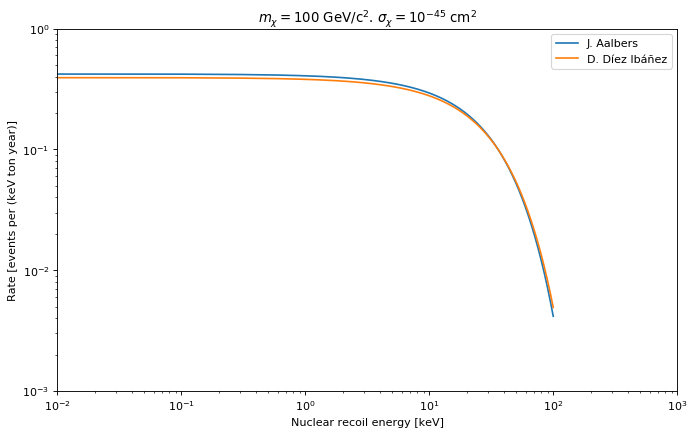

In [18]:
plt.figure(1)
plt.figure(figsize=(10, 6), dpi=80)
plt.plot(energies, sigJ, label='J. Aalbers')
plt.plot(energies, sigD, label='D. Díez Ibáñez')

print(sigJ[100])
print(sigD[100])

plt.xlabel("Nuclear recoil energy [keV]")
plt.ylabel("Rate [events per (keV ton year)]")
plt.title("$m_\chi = 100$ GeV/c${}^2$. $\sigma_\chi = 10^{-45}$ cm${}^2$")

plt.xlim(10**(-2), 10**(3))
plt.ylim(10**(-3), 10**(0))
plt.xscale('log')
plt.yscale('log')
plt.legend()

<Figure size 432x288 with 0 Axes>

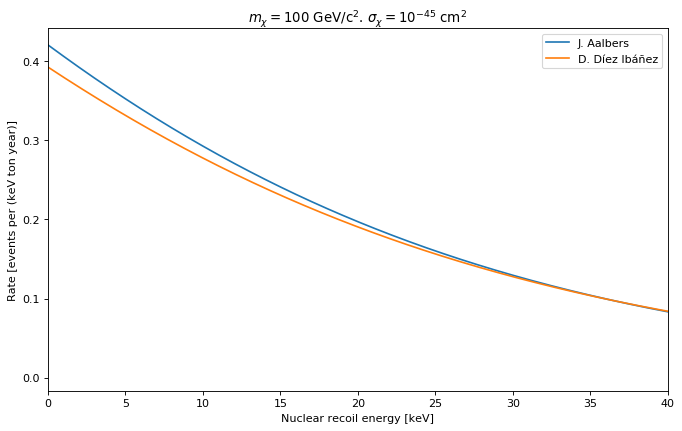

In [19]:
plt.figure(1)
plt.figure(figsize=(10, 6), dpi=80)
plt.plot(energies, sigJ, label='J. Aalbers')
plt.plot(energies, sigD, label='D. Díez Ibáñez')

plt.xlabel("Nuclear recoil energy [keV]")
plt.ylabel("Rate [events per (keV ton year)]")
plt.title("$m_\chi = 100$ GeV/c${}^2$. $\sigma_\chi = 10^{-45}$ cm${}^2$")
plt.xlim(0, 40)
#plt.ylim(0.1. 50)
#plt.yscale('log')
plt.legend()

3
3.6154645488559565


<Figure size 432x288 with 0 Axes>

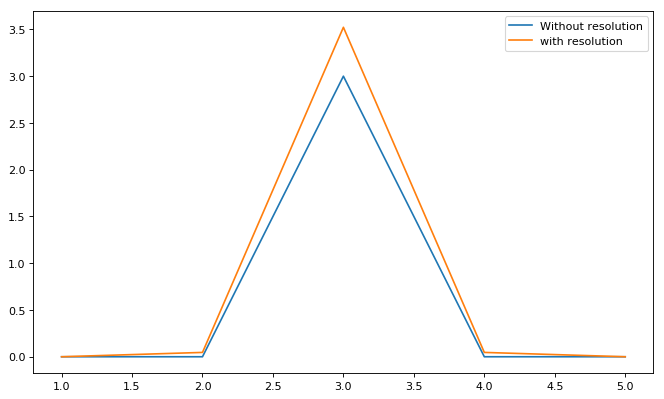

In [20]:
energies = [0.1, 0.3, 0.5, 1, 1.5, 3, 5, 10, 25, 50, 100]
e = [1, 2, 3, 4, 5]
delta = [0, 0, 3, 0, 0]

conv = wrDDI.resolution(e, delta, 3, 80)

print(np.sum(delta))
print(np.sum(conv))

plt.figure(1)
plt.figure(figsize=(10, 6), dpi=80)
plt.plot(e, delta, label='Without resolution')
plt.plot(e, conv, label='with resolution')

#plt.xlabel("Nuclear recoil energy [keV]")
#plt.ylabel("Rate [events per (keV ton year)]")
#plt.title("$m_\chi = 100$ GeV/c${}^2$. $\sigma_\chi = 10^{-45}$ cm${}^2$")
#plt.xlim(0, 40)
#plt.ylim(0.1. 50)
#plt.yscale('log')
plt.legend()